In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
import random
from datetime import datetime
# Import API key
from config import api_key



In [2]:
#import dataset
weather = pd.read_csv('Resources/worldcities.csv')
weather.head()

Country              City   Latitude  Longitude
0      ad  andorra la vella  42.500000   1.516667
1      ad           canillo  42.566667   1.600000
2      ad            encamp  42.533333   1.583333
3      ad        la massana  42.550000   1.516667
4      ad      les escaldes  42.500000   1.533333

In [3]:
# create random list
city_list = weather['City'].to_list()
city_list_random = random.sample(city_list,600)
city_list_random


['naihati',
 'bayeux',
 'moroeni',
 'kroderen',
 'kuklis',
 'petkovci',
 'temozon',
 'inverness',
 'gorey',
 'cathedral city',
 'valcau de jos',
 'overijse',
 'brightwater',
 'juchitepec',
 'zverinogolovskoye',
 'laminusa',
 'inhumas',
 'kafar manda',
 'tonkino',
 'pieve di soligo',
 'hauzenberg',
 'sualkuchi',
 'yanacancha',
 'akdepe',
 'drancy',
 'kerva',
 'rancho palos verdes',
 'dubti',
 'matsubara',
 'einsiedeln',
 'chernyshkovskiy',
 'heias',
 'krasnyy luch',
 'garbsen',
 'portogruaro',
 'lonoy',
 'nongan',
 'sarosd',
 'beroroha',
 'bacalan',
 'odessa',
 'skara',
 'proteccion',
 'rzhanitsa',
 'teresa',
 'buta',
 'nanyuki',
 'el tejar',
 'aketi',
 'bohl-iggelheim',
 'bad durkheim',
 'new castle',
 'jugureni',
 'tonacatepeque',
 'ogaminana',
 'chioggia',
 'kokkinokhoma',
 'caiaponia',
 'tarnok',
 'san gaspar ixchil',
 'ust-dzheguta',
 'northbrook',
 'kaniama',
 'neuhof',
 'zaachila',
 'duque de caxias',
 'mattersburg',
 'mul',
 'huangzhai',
 'armavir',
 'madaripur',
 'banda aceh',


In [14]:
# Build query URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# set up lists to hold reponse info
lat = []
lon = []
max_temp = []
city_name = []
cloudiness = []
humidity = []
windspeed = []
country = []
datetime = []

#counter to limit data extract from weather API to 50 per minute

count = 1
err = 0
t0 =time.time()
index = 0

# Loop through the list of cities and perform a request for data on each
for city in city_list_random: 
    if city not in city_name:
            response = requests.get(query_url + city).json()
            try:
#             if response['cod'] == 200: 
                city_name.append(city)
                country.append(response['sys']['country'])
                lat.append(response['coord']['lat'])
                lon.append(response['coord']['lon'])
                max_temp.append(response['main']['temp_max'])
                cloudiness.append(response['clouds']['all'])
                humidity.append(response['main']['humidity'])
                windspeed.append(response['wind']['speed'])
                datetime.append(response['dt'])
                index = index +1 
                count = count+1

                if count == 50: 
                    t1=time.time()
                    count = 1 
                    time.sleep(60-(t1-t0))
                    t0=time.time()
            except:
                continue
weather = {'city':city_name,'country':country,'latitude':lat,'longitude':lon,'max temperature':max_temp,'cloudiness (%)':cloudiness,'humidity (%)':humidity,'wind speed (mph)':windspeed,'date':datetime}
weather_df = pd.DataFrame.from_dict(weather, orient='index')
weather_df = weather_df.transpose()
weather_df = weather_df.dropna()
weather_df


city country latitude longitude max temperature cloudiness (%)  \
0     naihati      IN  22.9028   88.4169              90             20   
1      bayeux      BR   -7.125  -34.9322            82.4             75   
2     moroeni      RO  45.2167   25.4333           55.99             90   
3    kroderen      MK  41.4053   22.6653           66.42              7   
4      kuklis      BA  44.4531   19.0761              59             40   
..        ...     ...      ...       ...             ...            ...   
558   tautira      RS  44.9397   20.1539           62.01              0   
559  lamballe      SK  47.8698   18.1923           62.01              0   
560  akhuryan      PH  16.9333   120.867           63.75             95   
561    weener      RU    46.07     40.86           71.01             96   
562   vironia      BR -26.1772    -50.39           59.72             97   

    humidity (%) wind speed (mph)        date  
0             62            15.59  1620484271  
1             78             8.05  1620484447  
2             31             1.99  1620484448  
3             53            13.38  1620484448  
4             38             3.44  1620484448  
..           ...              ...         ...  
558           39             5.75  1620485114  
559           36             5.75  1620485114  
560           91             1.88  1620485115  
561           57              4.5  1620485115  
562           62             3.38  1620485115  

[563 rows x 9 columns]

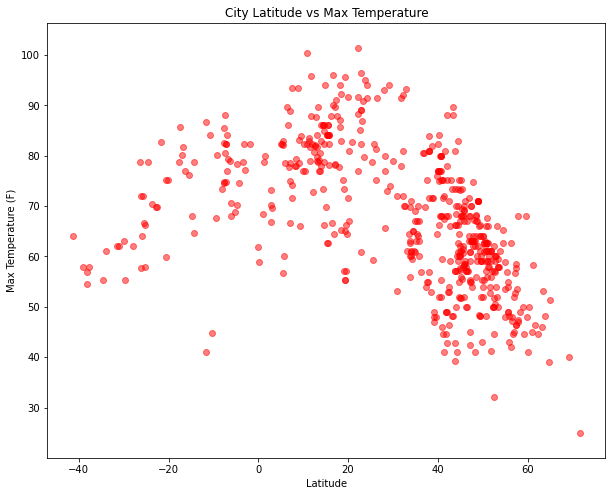

In [5]:
# scatterplot Temperature (F) vs. Latitude
plt.figure(figsize=(10,8))
plt.scatter(weather_df["latitude"], weather_df["max temperature"], color='r', alpha=0.5)
plt.ylim((weather_df["max temperature"].min()-5),(weather_df["max temperature"].max()+5))
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs Max Temperature')
# plt.savefig("LatVsTemp.png")
plt.show()

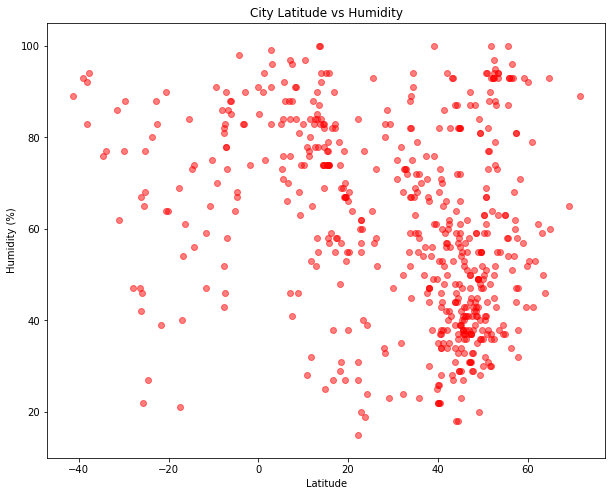

In [6]:
# scatterplot humidity vs. Latitude
plt.figure(figsize=(10,8))
plt.scatter(weather_df["latitude"], weather_df["humidity (%)"], color='r', alpha=0.5)
plt.ylim((weather_df["humidity (%)"].min()-5),(weather_df["humidity (%)"].max()+5))
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs Humidity')
# plt.savefig("LatVsTemp.png")
plt.show()

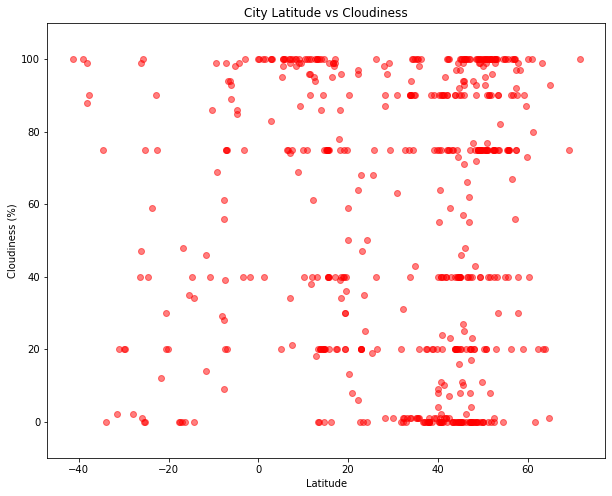

In [7]:
# scatterplot cloudiness vs. Latitude
plt.figure(figsize=(10,8))
plt.scatter(weather_df["latitude"], weather_df["cloudiness (%)"], color='r', alpha=0.5)
plt.ylim(-10,(weather_df["cloudiness (%)"].max()+10))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs Cloudiness')
# plt.savefig("LatVsTemp.png")
plt.show()

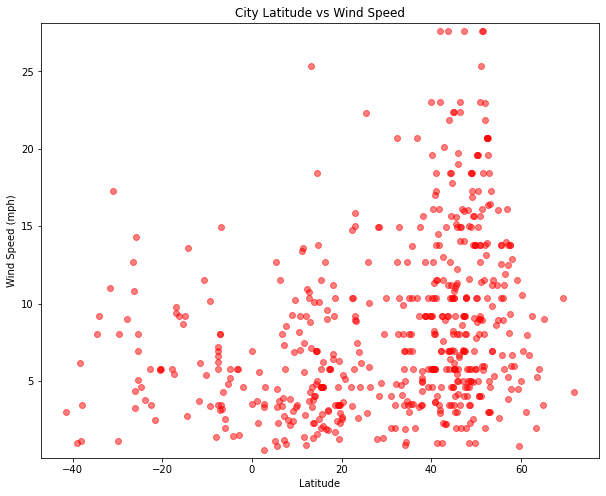

In [8]:
# scatterplot wind speed vs. Latitude
plt.figure(figsize=(10,8))
plt.scatter(weather_df["latitude"], weather_df["wind speed (mph)"], color='r', alpha=0.5)
plt.ylim((weather_df["wind speed (mph)"].min()-0.5),(weather_df["wind speed (mph)"].max()+0.5))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs Wind Speed')
# plt.savefig("LatVsTemp.png")
plt.show()

In [9]:
# creating northern and souther dataframes for the linear regression models
northern = weather_df.loc[weather_df["latitude"] >= 0]
southern = weather_df.loc[weather_df["latitude"] < 0]

The r-squared is : -0.68
y = -0.58x + 88.04


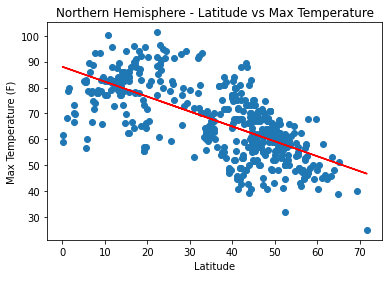

In [17]:
# linear regression on each relationship: Northern Hemisphere - Temperature (F) vs. Latitude

x_values = northern['latitude']
y_values = northern['max temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype(float), y_values.astype(float))
regression_values = x_values * slope + intercept
line_regression = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regression_values,"r-")
plt.annotate(line_regression,(0,0),fontsize=15,color="blue")
plt.title('Northern Hemisphere - Latitude vs Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig("output_data/Northern Hemisphere - Temperature vs. Latitude Linear Regression.png")
print(f"The r-squared is : {round(st.pearsonr(x_values, y_values)[0],2)}")
print(line_regression)

plt.show()


The r-squared is : 0.58
y = 0.55x + 80.92


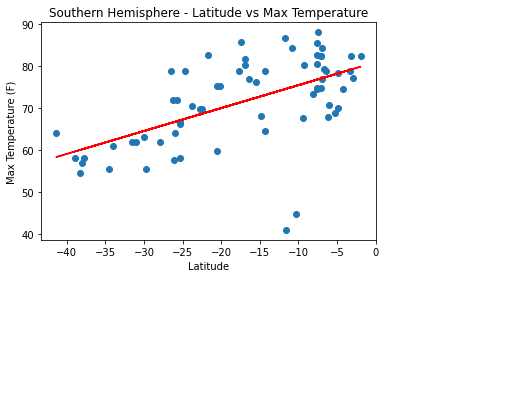

In [18]:
# linear regression on each relationship: Southern Hemisphere - Temperature (F) vs. Latitude

x_values = southern['latitude']
y_values = southern['max temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype(float), y_values.astype(float))
regression_values = x_values * slope + intercept
line_regression = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regression_values,"r-")
plt.annotate(line_regression,(0,0),fontsize=15,color="blue")
plt.title('Southern Hemisphere - Latitude vs Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig("output_data/Southern Hemisphere - Temperature vs. Latitude Linear Regression.png")
print(f"The r-squared is : {round(st.pearsonr(x_values, y_values)[0],2)}")
print(line_regression)

plt.show()

The r-squared is : -0.3
y = -0.39x + 73.56


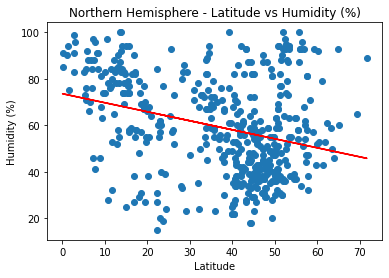

In [19]:
# linear regression on each relationship: Northern Hemisphere - Humidity (%) vs. Latitude

x_values = northern['latitude']
y_values = northern['humidity (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype(float), y_values.astype(float))
regression_values = x_values * slope + intercept
line_regression = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regression_values,"r-")
plt.annotate(line_regression,(6,10),fontsize=15,color="blue")
plt.title('Northern Hemisphere - Latitude vs Humidity (%)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig("output_data/Northern Hemisphere - Humidity vs. Latitude Linear Regression.png")
print(f"The r-squared is : {round(st.pearsonr(x_values, y_values)[0],2)}")
print(line_regression)

plt.show()

The r-squared is : 0.03
y = 0.06x + 71.06


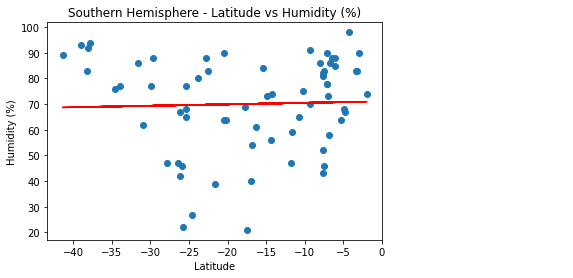

In [20]:
# linear regression on each relationship: Southern Hemisphere - Humidity (%) vs. Latitude

x_values = southern['latitude']
y_values = southern['humidity (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype(float), y_values.astype(float))
regression_values = x_values * slope + intercept
line_regression = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regression_values,"r-")
plt.annotate(line_regression,(6,10),fontsize=15,color="blue")
plt.title('Southern Hemisphere - Latitude vs Humidity (%)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig("output_data/Southern Hemisphere - Humidity vs. Latitude Linear Regression.png")
print(f"The r-squared is : {round(st.pearsonr(x_values, y_values)[0],2)}")
print(line_regression)

plt.show()

The r-squared is : -0.07
y = -0.16x + 61.54


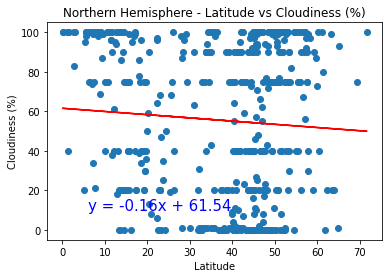

In [22]:
# linear regression on each relationship: Northern Hemisphere - Cloudiness (%) vs. Latitude

x_values = northern['latitude']
y_values = northern['cloudiness (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype(float), y_values.astype(float))
regression_values = x_values * slope + intercept
line_regression = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regression_values,"r-")
plt.annotate(line_regression,(6,10),fontsize=15,color="blue")
plt.title('Northern Hemisphere - Latitude vs Cloudiness (%)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig("output_data/Northern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")
print(f"The r-squared is : {round(st.pearsonr(x_values, y_values)[0],2)}")
print(line_regression)
plt.show()

The r-squared is : 0.12
y = 0.39x + 57.56


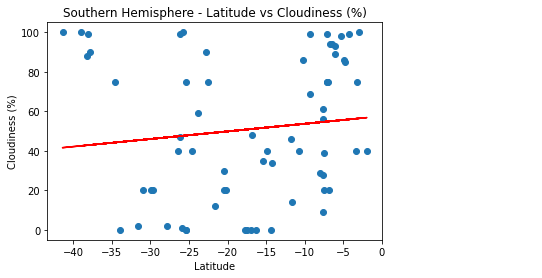

In [23]:
# linear regression on each relationship: Southern Hemisphere - Cloudiness (%) vs. Latitude

x_values = southern['latitude']
y_values = southern['cloudiness (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype(float), y_values.astype(float))
regression_values = x_values * slope + intercept
line_regression = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regression_values,"r-")
plt.annotate(line_regression,(2,5),fontsize=15,color="blue")
plt.title('Southern Hemisphere - Latitude vs Cloudiness (%)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig("output_data/Southern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")
print(f"The r-squared is : {round(st.pearsonr(x_values, y_values)[0],2)}")
print(line_regression)
plt.show()

The r-squared is : 0.31
y = 0.11x + 4.51


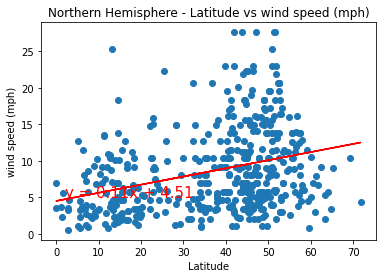

In [30]:
# linear regression on each relationship: Northern Hemisphere - wind speed (mph) vs. Latitude

x_values = northern['latitude']
y_values = northern['wind speed (mph)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype(float), y_values.astype(float))
regression_values = x_values * slope + intercept
line_regression = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regression_values,"r-")
plt.annotate(line_regression,(2,5),fontsize=15,color="red")
plt.title('Northern Hemisphere - Latitude vs wind speed (mph)')
plt.xlabel('Latitude')
plt.ylabel('wind speed (mph)')
plt.savefig("output_data/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")
print(f"The r-squared is : {round(st.pearsonr(x_values, y_values)[0],2)}")
print(line_regression)

plt.show()

The r-squared is : -0.11
y = -0.04x + 5.62


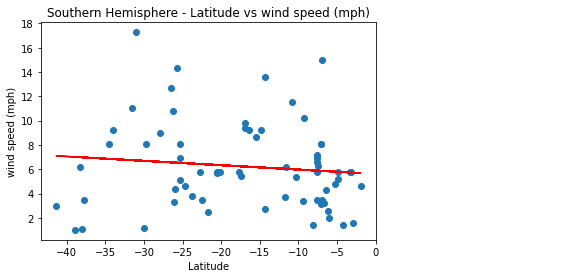

In [26]:
# linear regression on each relationship: Southern Hemisphere - wind speed (mph) vs. Latitude

x_values = southern['latitude']
y_values = southern['wind speed (mph)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype(float), y_values.astype(float))
regression_values = x_values * slope + intercept
line_regression = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regression_values,"r-")
plt.annotate(line_regression,(6,10),fontsize=15,color="blue")
plt.title('Southern Hemisphere - Latitude vs wind speed (mph)')
plt.xlabel('Latitude')
plt.ylabel('wind speed (mph)')
plt.savefig("output_data/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")
print(f"The r-squared is : {round(st.pearsonr(x_values, y_values)[0],2)}")
print(line_regression)

plt.show()

In [27]:
# Save city data into a csv file
weather_df.to_csv("output_data/cities.csv", index = False)